# Challenge #1: Statistical Modeling

The purpose of this test is to assess candidates’ analytical and modeling skills via a typical dataset we are dealing with in Marketing Science team. Based on the below dataset, please answer the following questions: 
 
•	Which media channel(s) are contributing to the growth of KPI?   
•	What is the cost efficiency for each media channel?   
•	What is the strategy to optimize media allocation for a given budget based on learnings from the model?   


### Author: Rishi Sankineni

### Step 1: Import all the necessary Python modules.

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data.csv", 
                 skip_blank_lines=False, ## do not skip blank lines in our dataset
                 keep_default_na = True, ## keep default NaN values
                 infer_datetime_format=True, ## infer the date column as datetime
                 low_memory=False, ## low memory tresspass
                 thousands=',') ## remove the commas from the numerical values( for ex: 1,200 would translate to 1200)

In [5]:
# This function will help us display our data. Max_rows and Max_columns can be altered as required.
def display_data(dframe):
    with pd.option_context("display.max_rows", 1080, "display.max_columns", 23): 
        display(dframe)

In [44]:
#display_data(df) # display the pandas dataframe - this is way too big
df.head(10) # display the first 10 rows.

date    KPI  GDN_Spend  GDN_IMP  FB_Spend  FB_IMP  \
0 2013-01-01  132.0        282   204064       985  114373   
1 2013-01-02  212.0        300   267370       851  109617   
2 2013-01-03  213.0        356   266885       788   99235   
3 2013-01-04  244.0        339   367992       731  100951   
4 2013-01-05  217.0        326   288617      1038  164600   
5 2013-01-06  209.0        361   324458      1272  189595   
6 2013-01-07  527.0        331   322465      1065  169616   
7 2013-01-08  483.0        363   301177      1005  135940   
8 2013-01-09  480.0        311   272885      1034  160714   
9 2013-01-10  425.0        297   258528      1076  131092   

   Google_nonbrand_Spend  Google_nonbrand_IMP Google_nonbrand_e_Spend  \
0                   1290                11357                       0   
1                   2215                19419                       0   
2                   2014                19395                       0   
3                   1980                20059                       0   
4                   1991                16985                       0   
5                   1917                17148                       0   
6                   2446                22515                       0   
7                   2703                23038                       0   
8                   2335                21941                       0   
9                   2227                21416                       0   

  Google_nonbrand_e_IMP     ...       YT_IMP  radio_spend  radio_imp  \
0                     0     ...            0          0.0        0.0   
1                     0     ...            0          0.0        0.0   
2                     0     ...            0          0.0        0.0   
3                     0     ...            0          0.0        0.0   
4                     0     ...            0          0.0        0.0   
5                     0     ...            0          0.0        0.0   
6                     0     ...            0          0.0        0.0   
7                     0     ...            0          0.0        0.0   
8                     0     ...            0          0.0        0.0   
9                     0     ...            0          0.0        0.0   

   tv60_imp  tv30_imp  tv15_imp  tv60_spend  tv30_spend  tv15_spend  \
0       0.0       0.0       0.0         0.0         0.0         0.0   
1       0.0       0.0       0.0         0.0         0.0         0.0   
2       0.0       0.0       0.0         0.0         0.0         0.0   
3       0.0       0.0       0.0         0.0         0.0         0.0   
4       0.0       0.0       0.0         0.0         0.0         0.0   
5       0.0       0.0       0.0         0.0         0.0         0.0   
6       0.0       0.0       0.0         0.0         0.0         0.0   
7       0.0       0.0       0.0         0.0         0.0         0.0   
8       0.0       0.0       0.0         0.0         0.0         0.0   
9       0.0       0.0       0.0         0.0         0.0         0.0   

   day_of_week  
0      Tuesday  
1    Wednesday  
2     Thursday  
3       Friday  
4     Saturday  
5       Sunday  
6       Monday  
7      Tuesday  
8    Wednesday  
9     Thursday  

[10 rows x 23 columns]

In [7]:
df.columns # check to see if all the columns were imported properly

Index(['date', 'KPI', 'GDN_Spend', 'GDN_IMP', 'FB_Spend', 'FB_IMP',
       'Google_nonbrand_Spend', 'Google_nonbrand_IMP',
       'Google_nonbrand_e_Spend', 'Google_nonbrand_e_IMP',
       'Google_brand_spend', 'Google_brand_imp', 'YT_Spend', 'YT_IMP',
       'radio_spend', 'radio_imp', 'tv60_imp', 'tv30_imp', 'tv15_imp',
       'tv60_spend', 'tv30_spend', 'tv15_spend'],
      dtype='object')

In [8]:
df.info() # view the datatype and non-missing values for every single column in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 22 columns):
date                       1078 non-null object
KPI                        1070 non-null float64
GDN_Spend                  1078 non-null int64
GDN_IMP                    1078 non-null int64
FB_Spend                   1078 non-null int64
FB_IMP                     1078 non-null int64
Google_nonbrand_Spend      1078 non-null int64
Google_nonbrand_IMP        1078 non-null int64
Google_nonbrand_e_Spend    144 non-null object
Google_nonbrand_e_IMP      144 non-null object
Google_brand_spend         1078 non-null int64
Google_brand_imp           1078 non-null int64
YT_Spend                   1078 non-null int64
YT_IMP                     1078 non-null int64
radio_spend                708 non-null float64
radio_imp                  709 non-null float64
tv60_imp                   709 non-null float64
tv30_imp                   709 non-null float64
tv15_imp                   709 non-null 

## Exploratory Data Analysis (EDA)

### Feature Engineering/Preprocessing

### 1) Let's see if we could add new features to our existing dataset. One of the features that'd be interesting to include is the "Day_of_week" field. This field could provide some insights on how the KPI is evolving across the week. But I think we should still be a bit skeptic about the daily KPI vs Day of Week correlation,  because advertising is known to have lag effects(ex: today's advertising may influence tomorrow's KPI)

In [9]:
df['date'] = pd.to_datetime(df['date']) # convert date to datetime object
df['day_of_week'] = df['date'].dt.weekday_name # extract the day of week from date

In [10]:
df['day_of_week'].value_counts()

Sunday       154
Monday       154
Tuesday      154
Thursday     154
Saturday     154
Friday       154
Wednesday    154
Name: day_of_week, dtype: int64

### 2) Day_of_week v/s KPI all through the week: It's interesting to witness a sudden drop in the average KPI after Tuesday. I think we're witnessing a sudden drop in the average KPI due to multiple reasons:

#### a) Maybe the average advertising budget/expense is lower on Thursday, Friday, and Saturday.

#### b) Maybe the number of ad impressions and/or click-thru rate(CTR) on Thursday, Friday, and Saturday are relatively low.

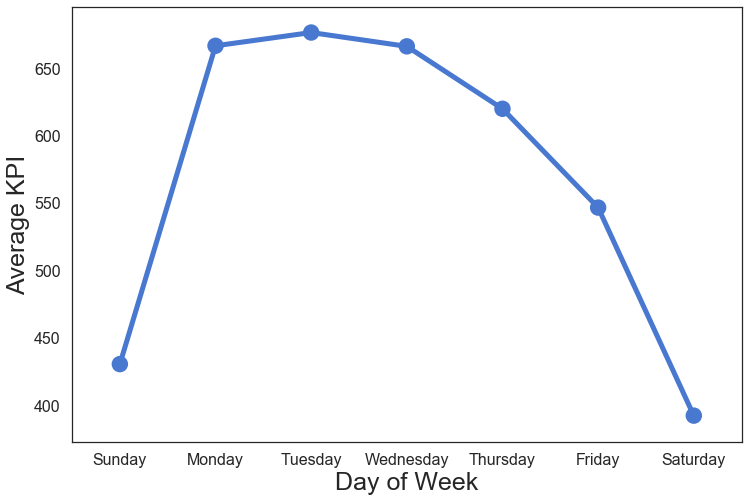

In [15]:
grouped_df = df_raw.groupby(['day_of_week'])['KPI'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12,8))
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.pointplot(grouped_df.day_of_week.values, grouped_df.KPI.values, alpha=0.8, order=['Sunday',
                                                                                      'Monday',
                                                                                      'Tuesday',
                                                                                      'Wednesday',
                                                                                      'Thursday',
                                                                                      'Friday',
                                                                                      'Saturday'
                                                                                     ])
plt.ylabel('Average KPI', size = 25.0)
plt.xlabel('Day of Week', size = 25.0)
plt.xticks(rotation='horizontal')
plt.show()

### 2) Missing Values: Let's see how many of them we have in our dataset.

In [12]:
null_count_df = df.isnull().sum(axis=0).reset_index() # check to see how many NaN's there are in our dataset.
null_count_df.columns = ['column_name', 'no_of_missing_values']
null_count_df

column_name  no_of_missing_values
0                      date                     0
1                       KPI                     8
2                 GDN_Spend                     0
3                   GDN_IMP                     0
4                  FB_Spend                     0
5                    FB_IMP                     0
6     Google_nonbrand_Spend                     0
7       Google_nonbrand_IMP                     0
8   Google_nonbrand_e_Spend                   934
9     Google_nonbrand_e_IMP                   934
10       Google_brand_spend                     0
11         Google_brand_imp                     0
12                 YT_Spend                     0
13                   YT_IMP                     0
14              radio_spend                   370
15                radio_imp                   369
16                 tv60_imp                   369
17                 tv30_imp                   369
18                 tv15_imp                   369
19               tv60_spend                   369
20               tv30_spend                   369
21               tv15_spend                   369
22              day_of_week                     0

### Takeaways: Since the columns "Google_nonbrand_e_Spend" and "Google_nonbrand_e_IMP" have almost 90% of their data unpopulated, we could drop them instead of imputing the missing values. Imputation (mean or regression) in this scenario might create a lot of bias, so we'll just avoid it.

In [13]:
## Let's first substitute all the NaN value with 0.
df = df.fillna(0)

In [14]:
## Drop the 2 columns from our dataframe and push the remaining columns into a new dataframe
df_raw = DataFrame(df,columns=['day_of_week','GDN_Spend','GDN_IMP','FB_Spend','FB_IMP','Google_nonbrand_Spend',
                               'Google_nonbrand_IMP', 'Google_brand_spend', 'Google_brand_imp', 
                               'YT_Spend', 'YT_IMP','radio_spend', 'radio_imp', 'tv60_imp', 'tv30_imp', 'tv15_imp',
                               'tv60_spend', 'tv30_spend', 'tv15_spend','KPI'])

### Let's see how our updated dataset looks like. Great! We don't see any missing values.

In [16]:
null_count_df = df_raw.isnull().sum(axis=0).reset_index() # check to see how many NaN's there are in our dataset.
null_count_df.columns = ['column_name', 'no_of_missing_values']
null_count_df

column_name  no_of_missing_values
0             day_of_week                     0
1               GDN_Spend                     0
2                 GDN_IMP                     0
3                FB_Spend                     0
4                  FB_IMP                     0
5   Google_nonbrand_Spend                     0
6     Google_nonbrand_IMP                     0
7      Google_brand_spend                     0
8        Google_brand_imp                     0
9                YT_Spend                     0
10                 YT_IMP                     0
11            radio_spend                     0
12              radio_imp                     0
13               tv60_imp                     0
14               tv30_imp                     0
15               tv15_imp                     0
16             tv60_spend                     0
17             tv30_spend                     0
18             tv15_spend                     0
19                    KPI                     0

In [17]:
### Convert the KPI datatype from Float to Int.
df_raw["KPI"] = df_raw["KPI"].astype(int)

### 3) Data Visualization

### Before we execute a linear regression model, it is advisable to validate that certain assumptions are met. We may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

### To perform a quick linearity check, we can use scatter diagrams (utilizing the seaborn library):

In [30]:
sns.pairplot(df_raw)

### Please double click on the image to zoom in. Ideally, it's only the bottom scatter plots we're interested in, because they help us understand whether the dependency b/w the dependent variable and independent varible(KPI) is linear/non-linear.

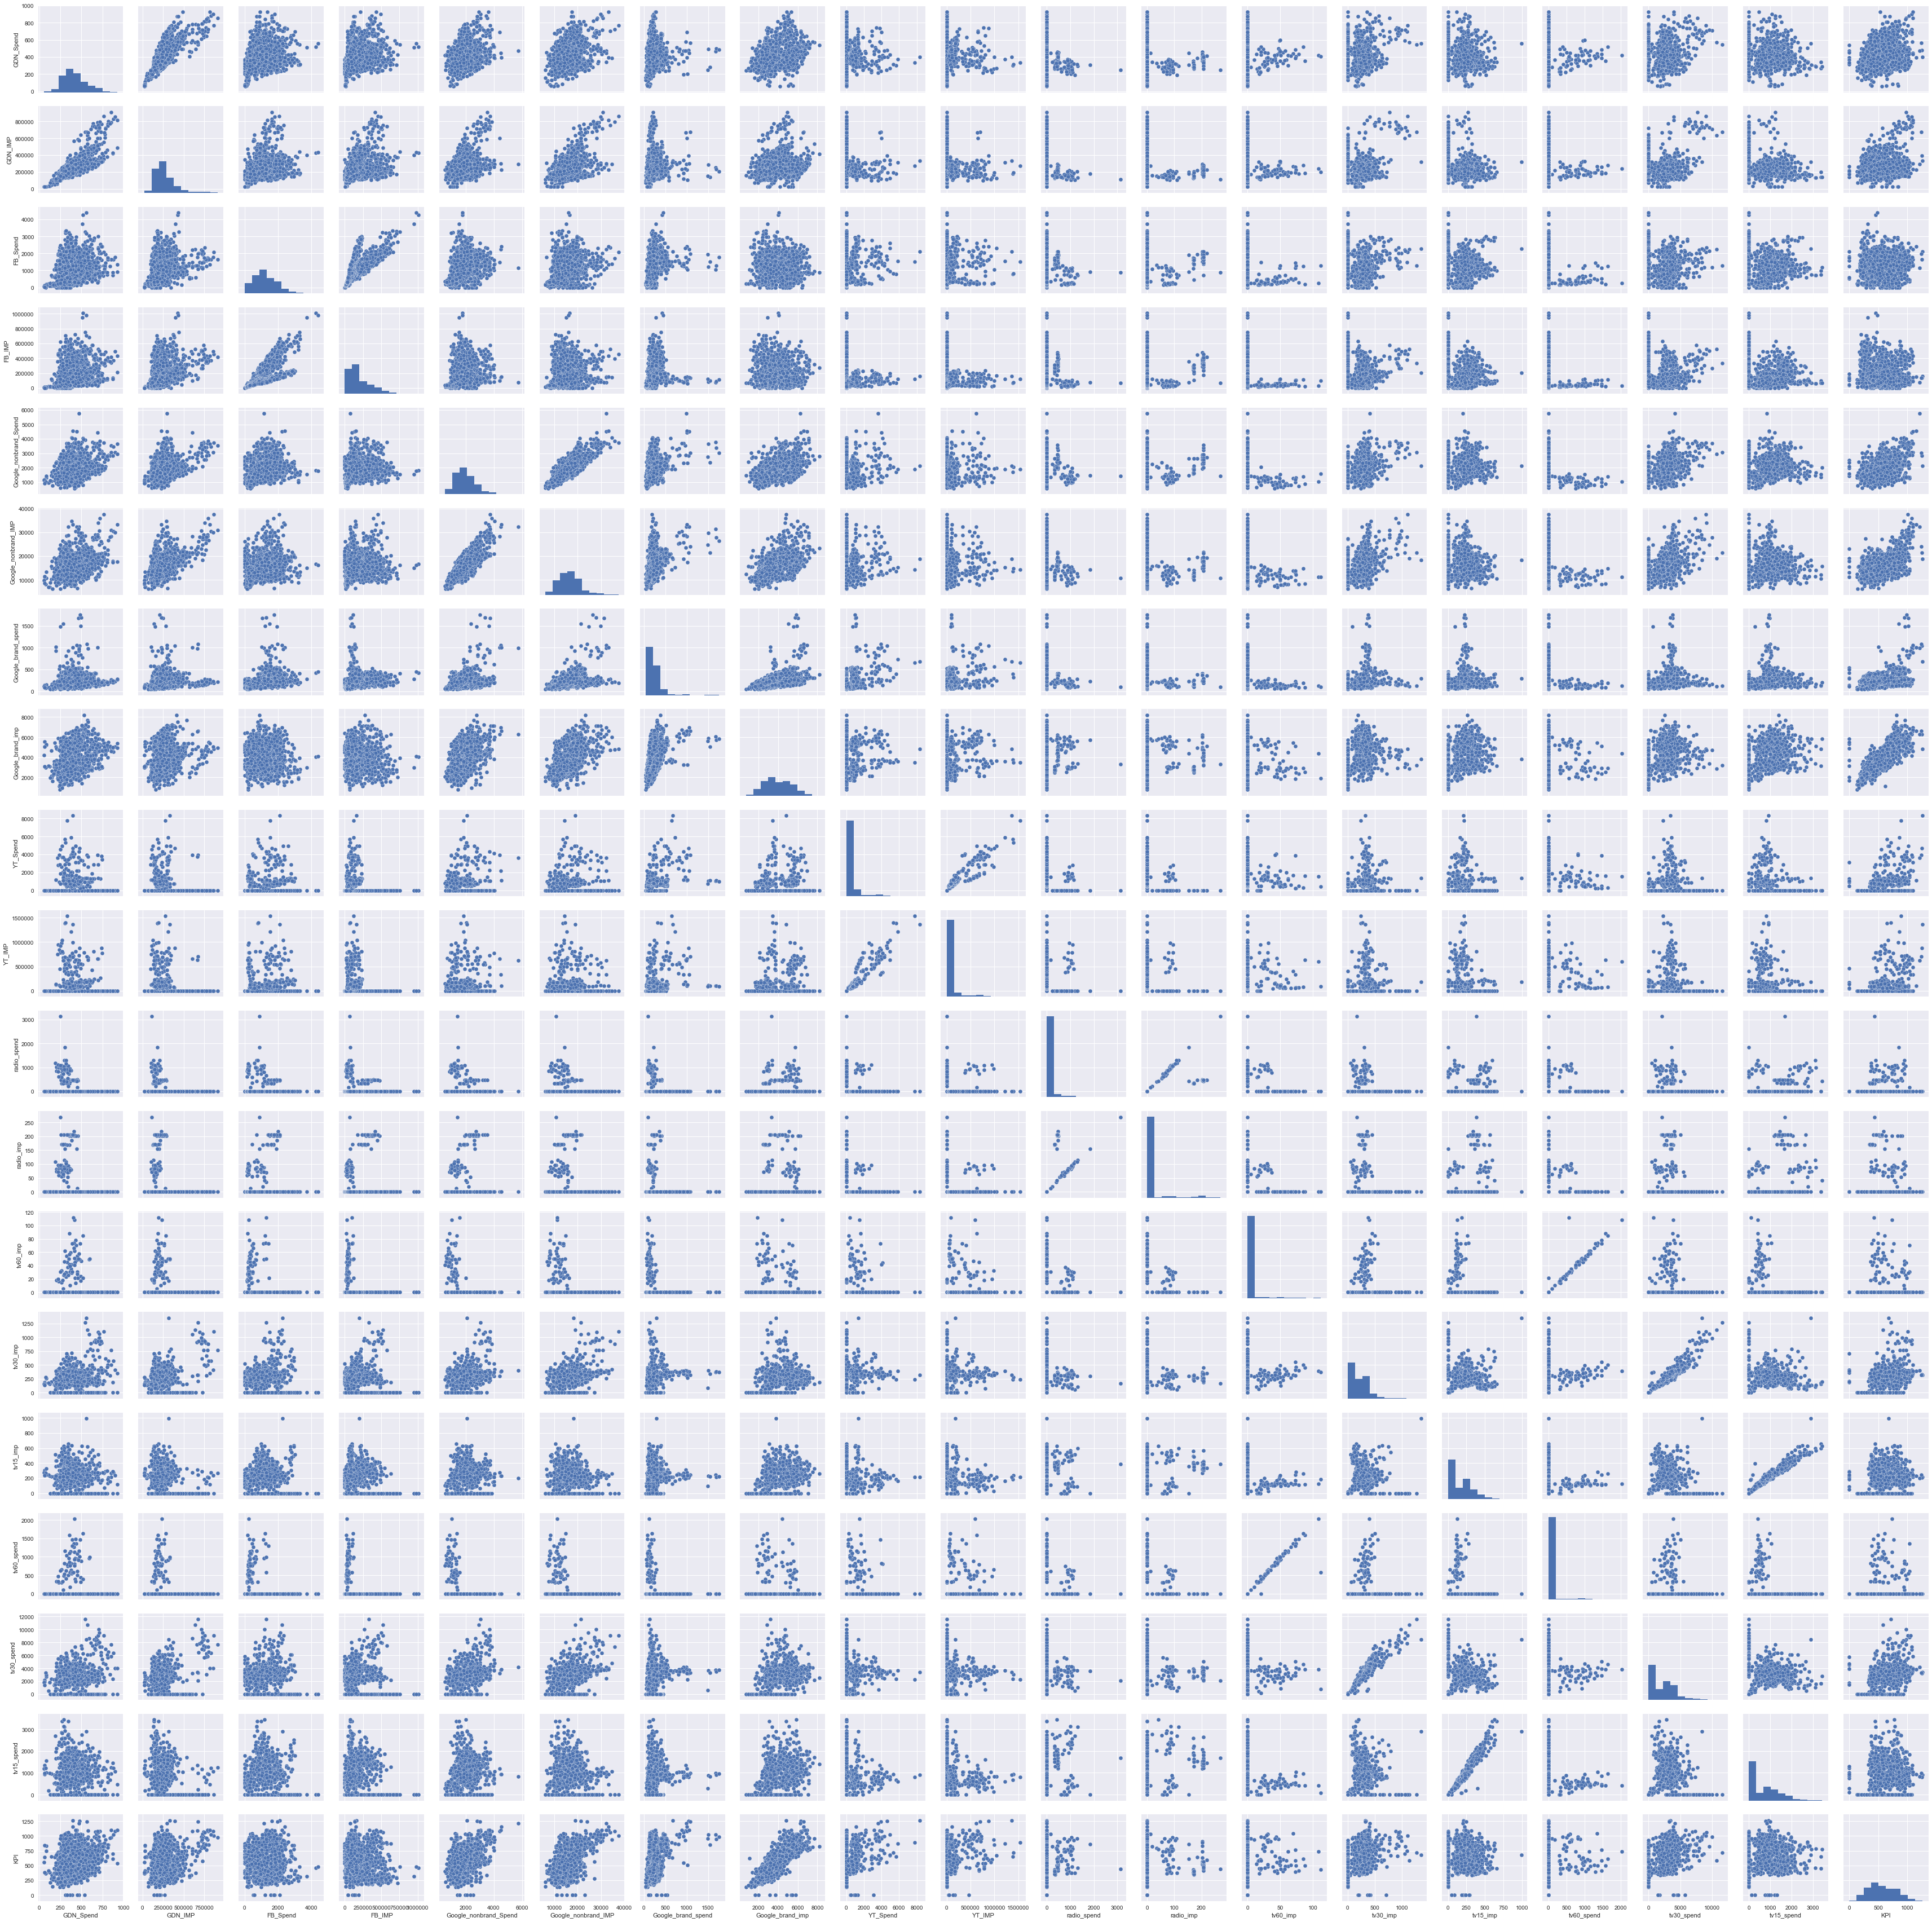

In [31]:
plt.show() 

### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

### Takeaway: Only four dependent variable show a linear relationship(positive/negative) with the dependent variable(KPI). Let's try to plot these four variables below:

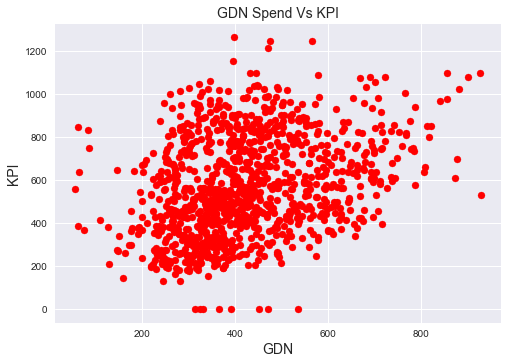

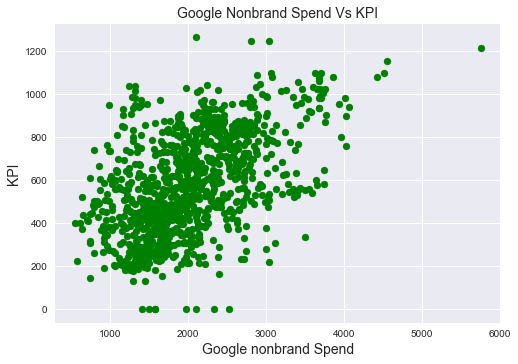

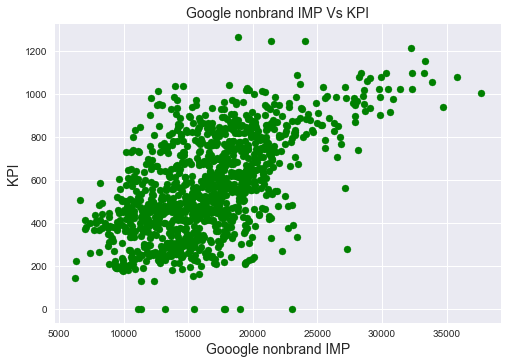

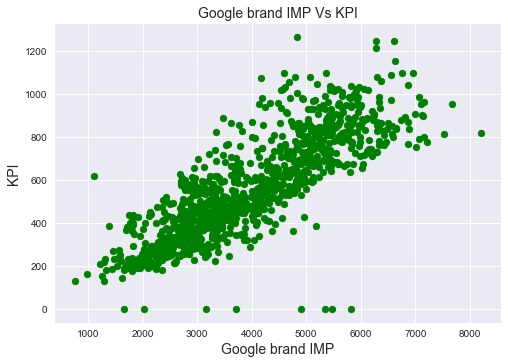

In [32]:
plt.scatter(df_raw['GDN_Spend'], df_raw['KPI'], color='red')
plt.title('GDN Spend Vs KPI', fontsize=14)
plt.xlabel('GDN', fontsize=14)
plt.ylabel('KPI', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df_raw['Google_nonbrand_Spend'], df_raw['KPI'], color='green')
plt.title('Google Nonbrand Spend Vs KPI', fontsize=14)
plt.xlabel('Google nonbrand Spend', fontsize=14)
plt.ylabel('KPI', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_raw['Google_nonbrand_IMP'], df_raw['KPI'], color='green')
plt.title('Google nonbrand IMP Vs KPI', fontsize=14)
plt.xlabel('Gooogle nonbrand IMP', fontsize=14)
plt.ylabel('KPI', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_raw['Google_brand_imp'], df_raw['KPI'], color='green')
plt.title('Google brand IMP Vs KPI', fontsize=14)
plt.xlabel('Google brand IMP', fontsize=14)
plt.ylabel('KPI', fontsize=14)
plt.grid(True)
plt.show()

### Okay, let's see what we interpret from these four scatter plots?

#### 1) Google Display Spend(GDN_Spend): Type of relationship- Linear : positive. Strength of relationship- Moderate.
#### 2) Google Nonbranded Search Spend: Type of relationship- Linear : positive. Strength of relationship- Moderate.
#### 3) Google Nonbranded Search Impression: Type of relationship- Linear: positive. Strength of relationship- Moderately strong.
#### 4) Google Branded Search Impression: Type of relationship- Linear: positive. Strength of relationship- Strong

#### Takeaway: Since our linear regression model  expects the variables to show some sort of linear relationship, we can use these four variables.

-------

## Predictive Model

### Great! Let's deep dive into this model we're trying to build.

### Questions to be answered:

#### Is this a classification model or regression model? - Regression, because we're trying to predict a continous valued outcome (KPI).

#### What features should we use? - We'll be using all four features from above. As previously explained, we're using those four features because they show a linear relationship with the dependent variable(KPI).

#### Are we splitting the data into train and test? how about cross-validation? - Yes, the data is split into 75% train and 25% test. We then perform 10-fold cross validation on our data.

#### Which model should we pick? - Multiple linear regression model. Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. Clearly, it is nothing but an extension of Simple linear regression.

In [22]:
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

#### So now, as before, we have the data frame that contains the independent variables and the data frame with the dependent variable (marked as “KPI”). Let’s fit a regression model using SKLearn. First we’ll define our X and Y .

In [23]:
#### Let's select our predictor variables and label variable.
X = df_raw[['GDN_Spend','Google_nonbrand_Spend','Google_nonbrand_IMP','Google_brand_imp']] # Input features
Y = df_raw['KPI'] # output column

#### Let's do a 75-25 train v/s test split.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [25]:
print (X_train.shape, y_train.shape) # train data rows and columns.
print (X_test.shape, y_test.shape) # test data rows and columns.

(808, 4) (808,)
(270, 4) (270,)


#### And then let's fit a model:

In [26]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### This output includes the intercept and coefficients. You can use this information to build the multiple linear regression equation as follows:

#### KPI = (Intercept) + (GDN_Spend coef) * X1 + (Google_nonbrand_Spend coef) * X2 + (Google_nonbrand_IMP coef) * X3 + (Google_brand_IMP coef) * X4

#### And once you plug the numbers:

#### KPI = (-115.910685115) + (0.06881486 ) * X1 + (0.00592945 ) * X2 + (0.00865589 ) * X3 + (0.12590604 ) * X4

In [27]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -115.910685115
Coefficients: 
 [ 0.06881486  0.00592945  0.00865589  0.12590604]


## The below cell displays the predicted output:

In [28]:
# prediction with sklearn
New_GDN_Spend = 500
New_Google_nonbrand_Spend = 1500
New_Google_nonbrand_IMP = 15000
New_Google_brand_imp = 3500
print ('Predicted KPI: \n', regr.predict([[New_GDN_Spend, New_Google_nonbrand_Spend, New_Google_nonbrand_IMP, New_Google_brand_imp]]))

Predicted KPI: 
 [ 497.90046371]


### Imagine that you want to predict the KPI after you collected the following data:

#### New_GDN_Spend = 500 (i.e., X1= 500)
#### New_Google_nonbrand_Spend = 1500 (i.e., X2=1500)
#### New_Google_nonbrand_IMP = 15000 (i.e., X3= 15000)
#### New_Google_brand_imp = 3500 (i.e., X4= 3500)

#### If you plug that data into the regression equation, you’ll get the exact same predicted results as displayed in the above cell:

#### KPI = ( -115.910685115) + (0.06881486 ) * (500) + (0.00592945 ) * (1500) + (0.00865589 ) * (15000 + (0.12590604 ) * 3500 = 497.90046371

In [29]:
predictions=regr.predict(X_test)
confidence = regr.score(X_test, y_test)
print("The prediction accuracy is", str(round(confidence,2)*100),"%")

The prediction accuracy is 71.0 %


### Just the accuracy won't give us an hollistic picture about our model performance. Let's look at R-squared and Root Mean Squared Error(RMSE).

In [40]:
from sklearn.metrics import mean_squared_error

# R^2
print(regr.score(X_test, y_test)) 

predictions = regr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Our model was able to predict the value of every KPI in the test set within" , str(round(rmse,2))  ," of the real KPI.")

0.707933144143
Our model was able to predict the value of every KPI in the test set within 121.51  of the real KPI.


In [44]:
df_preds = pd.DataFrame({'Actual KPI': y_test, 'Predicted KPI': predictions})  
df_preds.tail(10)

Actual KPI  Predicted KPI
397          939     670.919010
252          527     628.725266
700          799     714.355290
215          191     212.625409
678          713     880.636655
790          783     729.973056
993         1012     812.057640
425          639     664.843697
830          448     498.301051
1044         857     570.404932

### Takeaway: "The R-squared of the regression is the fraction of the variation in your dependent variable that is accounted for (or predicted by) your independent variables. The RMSE is a measure of how far off on average our model is from ground truth". We could have had an R^2 approaching 1 or an RMSE close to 0 but that’s totally and completely meaningless in the real-world. We have no idea how this model would generalize to data it hasn’t seen.

### Let's try to look at in-sample error( ISE/training error) and out-of-sample error(OSE/test error)

### Let's write an helper function to calculate ISE and OSE

In [30]:
def calc_ISE(X_train, y_train, model):
    '''returns the in-sample R^2 and RMSE; assumes model already fit.'''
    predictions = regr.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_train, y_train), rmse
    
def calc_OSE(X_test, y_test, model):
    '''returns the out-of-sample R^2 and RMSE; assumes model already fit.'''
    predictions = regr.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_test, y_test), rmse

In [31]:
from sklearn.metrics import mean_squared_error
model = regr.fit(X_train, y_train)
is_r2, ise = calc_ISE(X_train, y_train, model)
os_r2, ose = calc_OSE(X_test, y_test, model)

# show dataset sizes
data_list = (('In-Sample R-square', is_r2), ('Out-of-Sample R-square', os_r2), 
             ('In-Sample RMSE', ise), ('Out-of-Sample RMSE', ose))
for item in data_list:
    print('{:10}: {}'.format(item[0], item[1]))

In-Sample R-square: 0.7032417774821658
Out-of-Sample R-square: 0.7079331441425898
In-Sample RMSE: 127.87679962252844
Out-of-Sample RMSE: 121.50550313695393


### Takeaway: We can see that the in-sample R^2 and the out-of-sample R^2 are pretty much the same. Even more telling is the RMSE values. The RMSE for the data the model saw (ISE or training error) is slightly higher (by ~5%) than the RMSE for the data the model has never seen (OSE or test error). In machine learning speak our model is *not* overfitting, meaning it’s doing a much better job on the data it has never seen (i.e. the trained model does generalize well). The lesser the gap between between training error and test error, the lesser the overfitting. 

-----

## The below cell displays a comprehensive table with statistical info generated by statsmodels (python package): This information can provide you additional insights about the model used (such as the fit of the model, standard errors, etc.)

In [32]:
Y = Y.astype(float)
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     640.2
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          2.28e-282
Time:                        23:53:15   Log-Likelihood:                -6745.2
No. Observations:                1078   AIC:                         1.350e+04
Df Residuals:                    1073   BIC:                         1.353e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -102.48

## Interpreting the Table — 

### This is a very long table, isn’t it? First we have what’s the dependent variable and the model and the method. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line. Df of residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

----

### The coefficient of -102.48 (for constant) means that as the constant variable increases by 1, the predicted value of KPI decreases by -102.48. A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the constant has statistically significant p-value; there is a 95% confidence intervals for the co (meaning we predict at a 95% percent confidence that the value of constant is between -134.24 to -70.72).




# What could we do to improve the model accuracy?

### a) Little or no multi-collinearity: It is usually assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other. If you look at the bottom of the OLS Regression Results chart, then you'll see "The condition number is large, 7.45e+04. This might indicate that there are strong multicollinearity or other numerical problems". Let's try to backup this assumption by plotting a correlation matrix of our dependent variables.

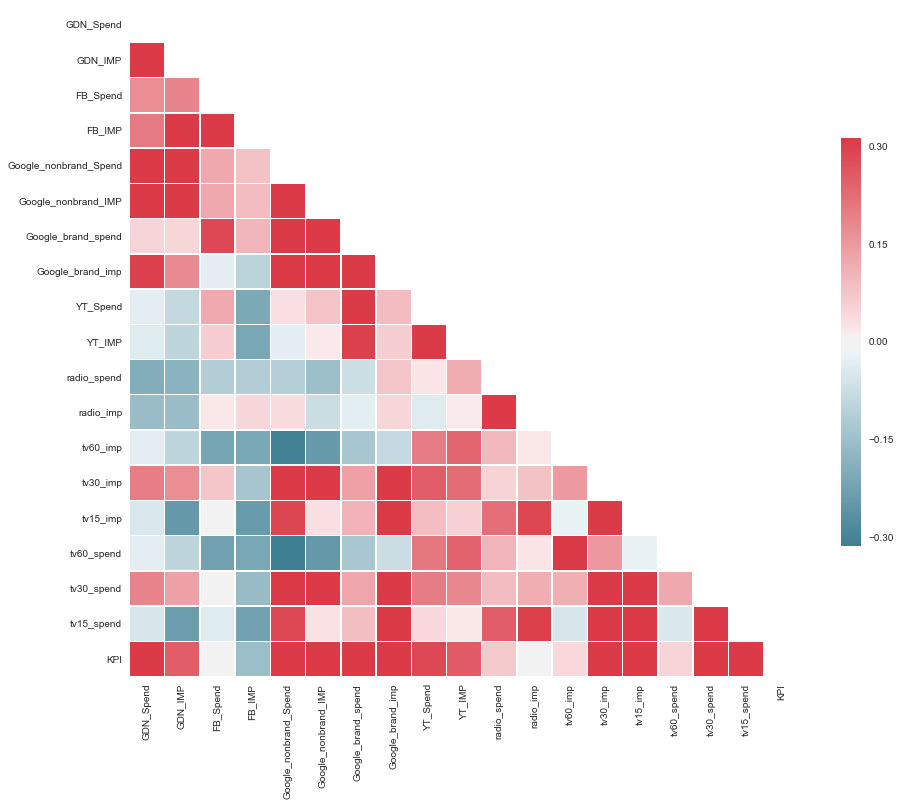

In [51]:
sns.set(style="white")

# Generate a large random dataset
temp3 = X.copy() # our dataframe

# Compute the correlation matrix
corr = df_raw.corr() # corr calculation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Takeaway: As you can see, our model clearly suffers from multi-collinearity. The dependent variables which we've chosen to train our linear regression model are intercorrelated with each other. The most plausible way to improve this model is by selecting a different set of features based on the feature importance chart and some sort of linear but weak relationship.

-----

# Question 1: Which media channel(s) are contributing to the growth of KPI?   

-----

## From the scatter plot figures in cell #32, we can extrapolate that the following media channels contribute to the growth of KPI. 

### 1) Google Display Spend(GDN_Spend).
### 2) Google Nonbranded Search Spend.
### 3) Google Nonbranded Search Impression.
### 4) Google Branded Search Impression.

----

# Question 2: What is the cost efficiency for each media channel?   

---

## Before we go on to calculate the cost efficiency for each media channel, let's see get down to the nitty gritty of it.

## Why does cost efficiency matter to us?

### "A goal of media marketing that is aimed at minimizing advertising expenses incurred while maximizing product publicity to a target market in terms of breadth and frequency of exposure. Maximizing cost efficiency in a marketing campaign is highly desirable for a business since the greatest product exposure is achieved for the least amount of financial investment." - BusinessDictionary

## How do we calculate it? What is the formula?

### "A measure of media effectiveness based on a comparison of potential or actual audience and the cost for placement, usually expressed as cost-per-thousand persons viewing. The process of Advertising Media Selection is the determining method of choosing the most cost-effective media for advertising, to attain the desired coverage and number of exposures in a target audience."

### The formula for calculating CPM(Cost per Thousand Impression): ( Cost to an advertiser / Impression ) * 1000

In [19]:
GDN_CPM = (df_raw["GDN_Spend"].sum()/df_raw["GDN_IMP"].sum()) * 1000
print("\n The cost per 1000 Google Display Impression is " + str(round(GDN_CPM,2)) + "$")

FB_CPM = (df_raw["FB_Spend"].sum()/df_raw["FB_IMP"].sum()) * 1000
print("\n The cost per 1000 Facebook Impression is " + str(round(FB_CPM,2)) + "$")

Google_NB_CPM = (df_raw["Google_nonbrand_Spend"].sum()/df_raw["Google_nonbrand_IMP"].sum()) * 1000
print("\n The cost per 1000 Google Non Branded Search Impression is " + str(round(Google_NB_CPM,2)) + "$")

Google_B_CPM = (df_raw["Google_brand_spend"].sum()/df_raw["Google_brand_imp"].sum()) * 1000
print("\n The cost per 1000 Google Branded Search Impression is " + str(round(Google_B_CPM,2)) + "$")

YT_CPM = (df_raw["YT_Spend"].sum()/df_raw["YT_IMP"].sum()) * 1000
print("\n The cost per 1000 YouTube Impression is " + str(round(YT_CPM,2)) + "$")

Radio_CPM = (df_raw["radio_spend"].sum()/df_raw["radio_imp"].sum()) * 1000
print("\n The cost per 1000 Radio Impression is " + str(round(Radio_CPM,2)) + "$")

TV60_CPM = (df_raw["tv60_spend"].sum()/df_raw["tv60_imp"].sum()) * 1000
print("\n The cost per 1000 TV60s Impression is " + str(round(TV60_CPM,2)) + "$")

TV30_CPM = (df_raw["tv30_spend"].sum()/df_raw["tv30_imp"].sum()) * 1000
print("\n The cost per 1000 TV30s Impression is " + str(round(TV30_CPM,2)) + "$")

TV15_CPM = (df_raw["tv15_spend"].sum()/df_raw["tv15_imp"].sum()) * 1000
print("\n The cost per 1000 TV15s Impression is " + str(round(TV15_CPM,2)) + "$")


 The cost per 1000 Google Display Impression is 1.57$

 The cost per 1000 Facebook Impression is 6.07$

 The cost per 1000 Google Non Branded Search Impression is 121.34$

 The cost per 1000 Google Branded Search Impression is 60.38$

 The cost per 1000 YouTube Impression is 5.2$

 The cost per 1000 Radio Impression is 5374.58$

 The cost per 1000 TV60s Impression is 18436.3$

 The cost per 1000 TV30s Impression is 10571.0$

 The cost per 1000 TV15s Impression is 4390.58$


## Takeaway: From the data above, we can conclude that a Google Display Impression is the most cost efficient media channel, because its CPM is the lowest( USD 1.57) among all of the media channels. The next cost efficient media channel is a YouTube Impression with a CPM of USD 5.2. I believe the CPM for a TV(60s, 30s, 15s) impression is way higher than a Google Display Impression, because the likelihood of the customer viewing a TV advertisement is way higher.

----

# Question 3: What is the strategy to optimize media allocation for a given budget based on learnings from the model?   

### Let's see how much it costs us to generate a single unit of KPI across different media channels

### How do we calculate Cost per KPI? :  (Cost to an advertiser / KPI) 

In [20]:
df_budget_allocation = DataFrame(df_raw,columns=['GDN_Spend','FB_Spend','Google_nonbrand_Spend',
                               'Google_brand_spend', 
                               'YT_Spend','radio_spend',
                               'tv60_spend', 'tv30_spend', 
                               'tv15_spend','KPI'])

#### The below cell is how we calculate the cost per KPI across different channels.

In [21]:
GDN_cost_eff = df_budget_allocation['GDN_Spend'].sum()/df_budget_allocation['KPI'].sum()
FB_cost_eff  = df_budget_allocation['FB_Spend'].sum()/df_budget_allocation['KPI'].sum()
Google_nonbrand_cost_eff = df_budget_allocation['Google_nonbrand_Spend'].sum()/df_budget_allocation['KPI'].sum()
Google_brand_spend_cost_eff = df_budget_allocation['Google_brand_spend'].sum()/df_budget_allocation['KPI'].sum()
YT_spend_cost_eff = df_budget_allocation['YT_Spend'].sum()/df_budget_allocation['KPI'].sum()
radio_spend_cost_eff = df_budget_allocation['radio_spend'].sum()/df_budget_allocation['KPI'].sum()
tv60_spend_cost_eff = df_budget_allocation['tv60_spend'].sum()/df_budget_allocation['KPI'].sum()
tv30_spend_cost_eff = df_budget_allocation['tv30_spend'].sum()/df_budget_allocation['KPI'].sum()
tv15_spend_cost_eff = df_budget_allocation['tv15_spend'].sum()/df_budget_allocation['KPI'].sum()

In [22]:
print("\n It costs " + str(round(GDN_cost_eff,2)) + "$ to generate 1 unit of KPI from Google Display")
print("\n It costs " + str(round(FB_cost_eff,2)) + "$ to generate 1 unit of KPI from Facebook")
print("\n It costs " + str(round(Google_nonbrand_cost_eff,2)) + "$ to generate 1 unit of KPI from Google Non Branded Search")
print("\n It costs " + str(round(Google_brand_spend_cost_eff,2)) + "$ to generate 1 unit of KPI from Google Branded Search")
print("\n It costs " + str(round(YT_spend_cost_eff,2)) + "$ to generate 1 unit of KPI from YouTube")
print("\n It costs " + str(round(radio_spend_cost_eff,2)) + "$ to generate 1 unit of KPI from Radio")
print("\n It costs " + str(round(tv60_spend_cost_eff,2)) + "$ to generate 1 unit of KPI from TV 60s")
print("\n It costs " + str(round(tv30_spend_cost_eff,2)) + "$ to generate 1 unit of KPI from TV 30s")
print("\n It costs " + str(round(tv15_spend_cost_eff,2)) + "$ to generate 1 unit of KPI from TV 15s")


 It costs 0.74$ to generate 1 unit of KPI from Google Display

 It costs 2.15$ to generate 1 unit of KPI from Facebook

 It costs 3.5$ to generate 1 unit of KPI from Google Non Branded Search

 It costs 0.42$ to generate 1 unit of KPI from Google Branded Search

 It costs 0.57$ to generate 1 unit of KPI from YouTube

 It costs 0.09$ to generate 1 unit of KPI from Radio

 It costs 0.08$ to generate 1 unit of KPI from TV 60s

 It costs 3.65$ to generate 1 unit of KPI from TV 30s

 It costs 1.18$ to generate 1 unit of KPI from TV 15s


### Takeaway: Great! Looks like a Google Display Impression costs us only USD 0.74 to generate a single unit of KPI. The CPM for the same channel is the lowest among all of the media channels, so let's deep dive to look into the budget allocation for this particular media channel. 

In [35]:
df_total_expense = DataFrame(df_raw,columns=['GDN_Spend','FB_Spend','Google_nonbrand_Spend',
                               'Google_brand_spend', 
                               'YT_Spend','radio_spend',
                               'tv60_spend', 'tv30_spend', 
                               'tv15_spend'])

#### Calculate the individual budget allocation for all media channels. 

In [36]:
individual_channel_cost = df_total_expense.sum(axis=0) ## advertising cost for individual channels
total_adv_cost = sum(df_total_expense.sum(axis=0)) ## total advertising cost

In [43]:
budget_per_channel = (individual_channel_cost/total_adv_cost)*100 # calculate the percentage share
print(str(round(budget_per_channel,2))) # round the % value to double digits

GDN_Spend                 5.97
FB_Spend                 17.36
Google_nonbrand_Spend    28.29
Google_brand_spend        3.41
YT_Spend                  4.64
radio_spend               0.73
tv60_spend                0.65
tv30_spend               29.44
tv15_spend                9.50
dtype: float64


## So, how do we allocate marketing budgets across channels based on the above data?

### 1) Paid Search: Looks like we only allocated ~6% of our marketing budget to Google Display. Since Google Display has the lowest CPM and also has lowest cost to generate a single unit of KPI, we should increase the allocated budget for this particular media channel.

### 2) Display Advertising: Since the CPM for display advertising ( TVs) is way higher than paid search and social media advertising, we should try to lower our allocated expenses for this particular media channel. Ideally, we want a media channel to be very cost efficient when we've a higher allocatet budget.

### 3) Online Video Advertising: Since the CPM and cost per KPI is relatively lower for an online video platform like YouTube, we should try to increase our budget from 4.6% to something higher (20%).

---